<a href="https://colab.research.google.com/github/arivval123/D4-matrikulasi/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 50


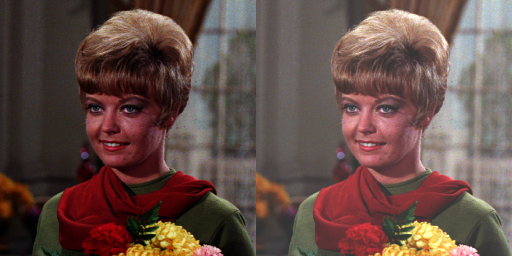

In [7]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')    

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness image - cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


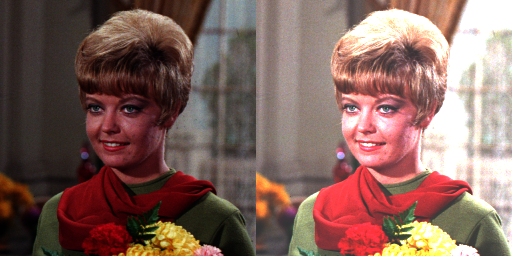

In [9]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan: 50


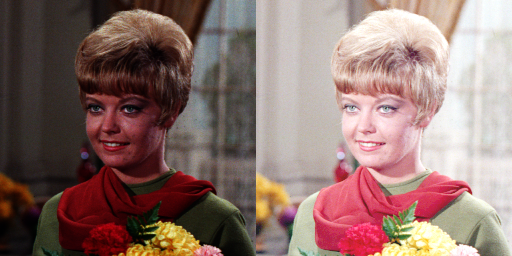

In [10]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log([1 + original[y,x,c]])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

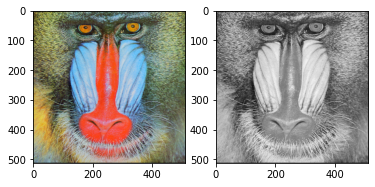

In [12]:
#Averaging
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff'), cv.COLOR_BGR2RGB)

R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]

gray_img = R/3 + G/3 + B/3

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')